In [3]:
import pandas as pd

In [57]:
df = pd.read_csv("uso_internet.txt")
df.head(4)
df.shape # hay 2455 personas y 4 variables

(2455, 4)

**Predecir el uso de internet, basandose en el sexo, edad y estudios.** , por medio del **Arbol de Decisión**.

- Variable dependiente: Internet_usage (**0**= no usa internet // **1**= usa internet)
- Variables independientes: Sex - age - education

In [54]:
# Cambiar las variables string a numericas (sex, education)

df1 = pd.get_dummies(df, drop_first=True)
df1.sample(5)

,internet_usage,age,sex_Mujer,education_Medios universitarios,education_Primaria,education_Secundaria,education_Sin estudios,education_Superiores
1592,1,34,0,0,0,0,0,0
1567,1,32,0,0,0,1,0,0
875,1,30,1,1,0,0,0,0
655,0,67,0,0,0,0,1,0
1912,1,62,0,0,0,1,0,0


In [18]:
# las variables explicativas son todas menos el uso de internet

explicativas = df1.drop(columns = "internet_usage")

# variable objetivo: uso de internet
objetivo = df1.internet_usage

In [28]:
# Modelo de Clasificacion: Arbol de Decision

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier ()

model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier()

### Visualizacion


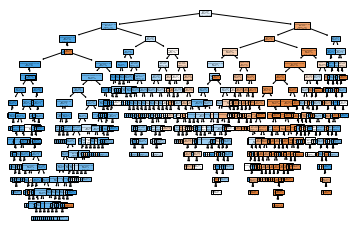

In [24]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True);

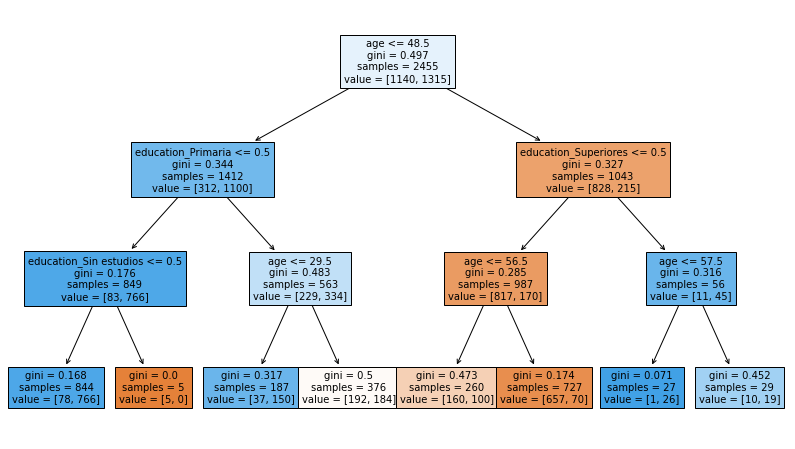

In [43]:
# tiene demasiado niveles

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X=explicativas, y=objetivo)

# se aumenta el tamaño de la fuente y el area del grafico

import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True, fontsize=10);

El modelo determinó que la variable explicativa mas importante es la edad.

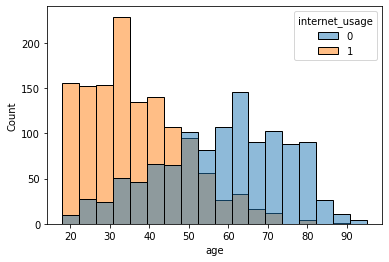

In [47]:
import seaborn as sns
sns.histplot(x= df1.age, hue=df1.internet_usage);

El histograma ratifica que la edad es muy importante al evaluar si la persona utiliza internet o no. El histograma muestra que a temprana edad mas se utiliza internet.

### Calculo de prediccion

In [51]:
a  = explicativas.head(1)
a

,age,sex_Mujer,education_Medios universitarios,education_Primaria,education_Secundaria,education_Sin estudios,education_Superiores
0,66,1,0,1,0,0,0


#### Explicacion de un caso: Edad 66 años, es mujer y tiene estudios primarios.

Que probabilidad de que haya usado internet?

Obsrvando el grafico del arbol de decision se obtiene lo siguiente:

- La primera condicion es la edad (mmodelo age<=45 años): como nuestra persona tiene mas de 45 años, se direcciona a la derecha.
- Estudios superiores <0.45: nuestra persona no tiene estudios superiores, por tanto, se direcciona a la izquierda.
- Edad <= 56.5 años: como nuestra persona es mayor (tiene 66 años), decae hacia la derecha. (ultimo recorrido)

Finalmente, cuantas personas estan en la misma situacion que nuestra señora? segun informacion del modelo son 727 personas y cuantas de ellas han usado internet? son 70 personas.

Entonces la probabilidad de que nuestra señora haya usado internet es = (70/727) = 0.096 (**9,6%**).


In [53]:
# Podemos utilizar una funcion y calculamos la probabilidad

model.predict_proba(a)

array([[0.90371389, 0.09628611]])

Los resultados concuerdan con los obtenidos.

### Score del Modelo

In [63]:
y_pred = model.predict(explicativas)
# adjuntamos las predicciones al df

df1["pred"] = y_pred

# solamente dejamos las predicciones y el target

df1.head(10)[["internet_usage","pred"]]

,internet_usage,pred
0,0,0
1,1,0
2,1,1
3,0,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


podemos observar que el modelo tiene malas predicciones (caso 3). Procedemos a calcular la tasa de acierto del modelo.

In [69]:
# Tasa de Acierto del Modelo

(df1["internet_usage"]==df1["pred"]).mean()

0.8044806517311609

El modelo tiene una tasa de acierto del **80.44%**.